In [16]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

## Inflace

In [3]:
data_inflace=pd.read_csv('ukol_02_a.csv')
data_inflace.head()

,Country,98,97
0,BE,31,34
1,BG,22,31
2,CZ,34,42
3,DK,28,33
4,D-W,33,40


In [4]:
data_inflace=data_inflace.rename(columns={'98':'zima_22/23','97':'leto_22'})
data_inflace

,Country,zima_22/23,leto_22
0,BE,31,34
1,BG,22,31
2,CZ,34,42
3,DK,28,33
4,D-W,33,40
5,DE,33,40
6,D-E,32,40
7,EE,23,29
8,IE,36,47
9,EL,27,23


Keďže budeme porovnávať percento ľudí, ktorí v jedno obdobie v daných krajinách uviedli, že inflace je jeden z ich najväčších problémov s percentom ľudí, ktorí v druhom období v tých istých krajinách uviedli, že inflace je jeden z ich najväčších problémov, mohli by sme na porovnanie, či sa toto percento statisticky významne zmenilo, párový t-test. Tento ale predpokladá normalitu rozdelení, ktorú najprv musíme otestovať.

In [5]:
shapiro_leto = stats.shapiro(data_inflace['leto_22'])
 
shapiro_zima = stats.shapiro(data_inflace['zima_22/23'])

f"shapiro_leto vysledok {shapiro_leto}     " \
f"shapiro_zima vysledok {shapiro_zima}"

'shapiro_leto vysledok ShapiroResult(statistic=0.9694532752037048, pvalue=0.33090925216674805)     shapiro_zima vysledok ShapiroResult(statistic=0.9803104996681213, pvalue=0.687289297580719)'

Keďže nulová hypotéza v Shapiro-Wilk teste tvrdí, že dáta patria do normálneho rozdelenia, vzhľadom k p-hodnote oboch stĺpcov môžeme dôjsť k záveru, že pozorovania v oboch obdobiach vychádzajú z normálneho rozdelenia. Ani u letných ani u zimných pozorovaní teda nezamietame nulovú hypotézu o tom, že výber pochádza z normálneho rozdelenia. U letných pozorovaní je pravdepodobnosť, že zamietneme nulovú hypotézu a tá bude platiť (chyba I. druhu) 33%, u zimných pozorovaní je pravdepodobnosť tejto chyby pri zamietnutí nulovej hypotézu dokonca 69%. Dolu v grafe hustoty pravdepodobnosti aj vidíme, že zimné pozorovania majú tvar ešte bližší normálnemu rozdeleniu než letné.

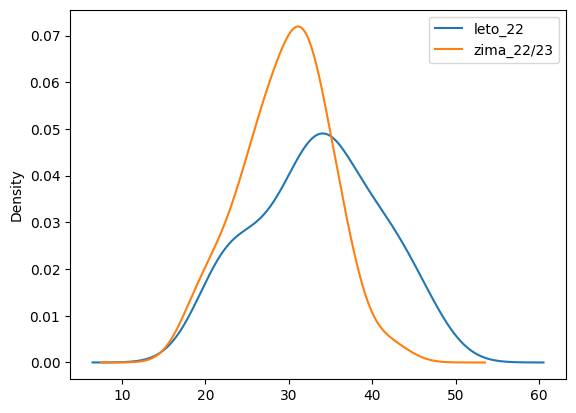

In [6]:
line_1=data_inflace['leto_22'].plot.kde()
line_2=data_inflace['zima_22/23'].plot.kde()
plt.legend()


In [7]:
normaltest_leto = stats.normaltest(data_inflace['leto_22'])
normaltest_zima = stats.normaltest(data_inflace['zima_22/23'])
f"normaltest_leto vysledok {normaltest_leto}     " \
f"normaltest_zima vysledok {normaltest_zima}"

'normaltest_leto vysledok NormaltestResult(statistic=2.045959725455584, pvalue=0.3595220161281381)     normaltest_zima vysledok NormaltestResult(statistic=0.19683247870207005, pvalue=0.906271599332527)'

Vyššie uvedený test potvrdzuje výsledky Shapiro-Wilkova testu normality s ešte istejším záverom o tom, že výbery pochádzajú z normálneho rozdelenia.

Keďže sme nezamietli nulovú hypotézu, že oba výbery pochádzajú z normálneho rozdelenia, môžeme vykonať párový t-test.

In [8]:

parovy_t_test = stats.ttest_rel(data_inflace['leto_22'], data_inflace['zima_22/23'])
parovy_t_test

TtestResult(statistic=3.868878598419143, pvalue=0.0003938172257904746, df=40)

Nulová hypotéza v párovom t-teste tvrdí, že dva závislé výbery majú rovnaký priemer. Vzhľadom k p hodnote hlboko pod akoukoľvek standardnou hladinou významnosti môžeme túto nulovú hypotézu zamietnuť s 0,04% pravdepodobnosťou, že zamietnutím spôsobíme chybu I.druhu. Dochádzame teda k záveru, že percento ľudí, ktorí považovali infláciu za jeden z ich najväčších problémov bolo iné v lete ako v nasledujúcej zime.

In [9]:
parovy_t_test_jednostranny = stats.ttest_rel(data_inflace['leto_22'], data_inflace['zima_22/23'],alternative="greater")
parovy_t_test_jednostranny

TtestResult(statistic=3.868878598419143, pvalue=0.0001969086128952373, df=40)

Pri jednostrannom teste, kde alternatívnou hypotézou je, že priemer rozdelenia z prvého výberu je väčší ako priemer rozdelenia z druhého výberu, môžeme zamietnuť nulovú hypotézu, ktorá  tvrdí, že priemer prvého výberu je rovný priemeru z druhého výberu. V lete 2022 bolo teda štatisticky významne väčšie percento ľudí, ktorí v v krajinách Európy považovali infláciu za jeden z ich najväčších problémov. V prípade, že by sme jednostrannú hypotézu definovali opačne, teda, že v lete ľudí trápila inflácia menej ako v zime, neboli by sme schopní zamietnuť nulovú hypotézu o rovných priemeroch a takýto test by nám neumožnil vziať do úvahy možnosť, že v lete ľudí trápila inflácia naopak viac.

## Dôvera v štát a EU

In [10]:
data_dovera=pd.read_csv('ukol_02_b.csv')
countries=pd.read_csv('countries.csv')
data_dovera_eu=pd.merge(data_dovera,countries,on=['Country'])
data_dovera_eu.head()

,Country,National Government Trust,EU Trust,Country Name,Euro
0,BE,40,55,Belgium,1
1,BG,19,49,Bulgaria,0
2,CZ,30,43,Czechia,0
3,DK,52,65,Denmark,0
4,DE,49,49,Germany,1


Najprv zhodnotíme, či výbery pochádzajú z normálneho rozdelenia. Použijeme testy ako v predchádzajúcej časti.

In [11]:
shapiro_NG_Trust = stats.shapiro(data_dovera_eu['National Government Trust'])
 
shapiro_EU_Trust = stats.shapiro(data_dovera_eu['EU Trust'])

f"shapiro_NG_Trust vysledok {shapiro_NG_Trust}     " \
f"shapiro_EU_Trust vysledok {shapiro_EU_Trust}"

'shapiro_NG_Trust vysledok ShapiroResult(statistic=0.9438267350196838, pvalue=0.15140558779239655)     shapiro_EU_Trust vysledok ShapiroResult(statistic=0.9735807180404663, pvalue=0.6981646418571472)'

In [12]:
shapiro_EU_Trust.statistic #takto mozeme volat jednotlive statistiky a pvalue

0.9735807180404663

Z vyššie uvedeného vyplýva, že na základe p hodnôt nemôžeme zamietnuť nulovú hypotézu, že výber pochádza z normálneho rozdelenia. Použijeme teda test založený na Pearsonovom korelačnom koeficiente.

In [13]:
Pearson_Trust = stats.pearsonr(data_dovera_eu['National Government Trust'], data_dovera_eu['EU Trust'])
Pearson_Trust

PearsonRResult(statistic=0.6097186340024556, pvalue=0.0007345896228823406)

Z vyššie uvedeného vyplýva, že existuje štatisticky významná závislosť medzi dôverou obyvateľov štátu v národnú vládu a dôverou v EU. Keďže chceme zistiť, aký má táto závislosť smer, skúsime ešte použiť test štatistickej lineárnej závislosti pomocou Pearsonovho koeficientu s jednostrannou alternatívnou hypotézou. V jednostrannej hypotéze v alternatíve predpokladáme, že v krajinách s veľkou dôverou v národné vlády je prítomná aj veľká dôvera v EU.

In [14]:
Pearson_Trust_jednostranna = stats.pearsonr(data_dovera_eu['National Government Trust'], data_dovera_eu['EU Trust'], alternative="greater")
Pearson_Trust_jednostranna

PearsonRResult(statistic=0.6097186340024556, pvalue=0.0003672948114411703)

Vyššie sme ukázali, že môžeme zamietnuť nulovú hypotézu o neexistujúcej štatisticky významnej lineárnej závislosti v prospech alternatívnej hypotézy, že existuje pozitívna štatisticky významná lineárna závislosť medzi vyššie uvedenými dvomi premennými.

## Dôvera v EU a euro

In [20]:
data_eu_euro=data_dovera_eu[data_dovera_eu['Euro']==1]
data_eu_bez_euro=data_dovera_eu[data_dovera_eu['Euro']==0]

Na  základe vyššie uvedených testov predpokladáme, že dáta majú normálne rozdelenie. Keďže ide o porovnávanie priemeru v dvoch súboroch, ktoré nie sú párové, t.j. nejde o porovnávanie rovnakých objektov v rôznom čase, použijeme obyčajný t-test na zhodnosť priemeru dvoch skupín, aby sme zistili, či dôvera v EU je rovnaká alebo iná v krajinách eurozóny a v ostatných krajinách.

Druhým predpokladom použitia t-testu je okrem normality dát zhoda rozptylov v súbore. Overíme si ju F testom o zhode rozptylov dvoch nezávislých výberov.

In [45]:
std_euro=data_eu_euro['EU Trust'].std()  # vyberova smerodatna odchylka  https://www.tutorialspoint.com/how-to-perform-an-f-test-in-python
std_bez_euro=data_eu_bez_euro['EU Trust'].std() #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html#pandas.DataFrame.std
var_euro=std_euro**2  #vyberovy rozptyl
var_bez_euro=std_bez_euro**2
F_test=var_euro/var_bez_euro  #F test o  zhodnosti rozptylov
n_euro=data_eu_euro['EU Trust'].describe().loc['count']
n_bez_euro=data_eu_bez_euro['EU Trust'].describe().loc['count']
v_euro=n_euro-1  #stupne volnosti
v_bez_euro=n_bez_euro-1


Teraz musíme nájsť kvantily F rozdelenia pre 5 % hladinu významnosti,obojstranný F test s vyššie uvedenými stupňami voľnosti (v_euro, v_bez_euro)

In [55]:
critical_values = stats.f.ppf([0.025, 0.975], v_euro, v_bez_euro)
critical_values
f"Hodnota testoveho kriteria F testu je {F_test} a    " \
f"vymezení kritického oboru je (0-{critical_values[0]}) a ({critical_values[1]}-nekonecno)"

'Hodnota testoveho kriteria F testu je 1.5610960580368844 a    vymezení kritického oboru je (0-0.326693531626342) a (4.05375851582983-nekonecno)'

Testove kriterium teda spada do oboru prijeti a z toho dovodu nezamietame nulovu hypotezu o zhodnosti rozptylov. 
Ešte vyskúšame vypočítať p hodnotu tohoto obojstranného testu.

In [65]:
p_value_F_horna = 1-stats.f.cdf(F_test, v_euro, v_bez_euro)  #snha o p value
p_value_F_horna

0.2660704582477239

In [63]:
p_value_F_dolna= stats.f.cdf((var_bez_euro/var_euro),v_bez_euro, v_euro)
p_value_F_dolna

0.26607045824772413

In [67]:
p_value_celkova=p_value_F_horna + p_value_F_dolna
p_value_celkova  #ale nie som si tymto ista (https://math.stackexchange.com/questions/2725996/finding-the-p-value-of-a-2-sided-f-test)

0.532140916495448

Môžeme pokračovať na t-test o zhodnosti priemeru dvoch výberových súborov.

In [66]:
t_test_Trust = stats.ttest_ind(data_eu_euro["EU Trust"], data_eu_bez_euro['EU Trust'])
t_test_Trust

Ttest_indResult(statistic=-0.33471431258258433, pvalue=0.7406326832748829)

Keďže má t-test nulovú hypotézu, ktorá tvrdí, že oba nezávislé výberové súbory majú rovnakú strednú hodhotu (priemer), na základe p hodnoty nemôžeme zamietnuť túto nulovú hypotézu.
Dôvera v EU teda nie je štatisticky významne odlišná v štátoch eurozóny a štátoch, ktoré euro nepoužívajú.